In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# EDA

In [169]:
df_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [170]:
df_review.isnull().sum()

review       0
sentiment    0
dtype: int64

In [171]:
df_review.dtypes

review       object
sentiment    object
dtype: object

In [172]:
df_review.shape

(50000, 2)

In [173]:
df_review.columns

Index(['review', 'sentiment'], dtype='object')

In [174]:
#taking a smaller sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives

In [175]:
df_positive=df_review[df_review["sentiment"]=="positive"][:8000]
df_negative=df_review[df_review["sentiment"]=="negative"][:2000]

#concat postive and negative
df_review_imb=pd.concat([df_positive,df_negative])
df_review_imb.sentiment.value_counts()

positive    8000
negative    2000
Name: sentiment, dtype: int64

# Dealing with  Imbalanced Data 

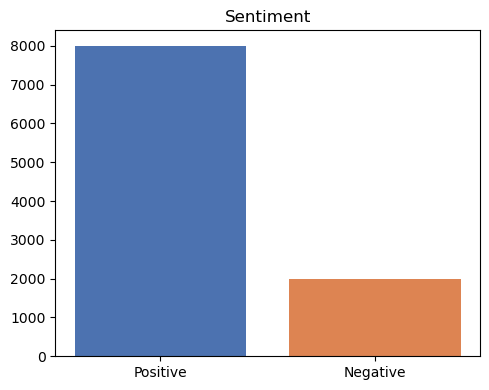

In [176]:
colors = sns.color_palette('deep')

plt.figure(figsize=(5,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [177]:
#to balance the data there are many ways, In this case we are using the Python imbalanced-learn module
!pip install imblearn

In [178]:
from imblearn.under_sampling import  RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])
df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
3995,'Ray' lives on<br /><br />Ray Dir- Taylor Hack...,positive
3996,Sidney Young (Pegg) moves from England to New ...,positive
3997,I'd love to see some tie-in between NightBreed...,positive
3998,SPOILER NOTHING BUT SPOILER<br /><br />I have ...,positive


In [179]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    8000
negative    2000
dtype: int64
sentiment
negative    2000
positive    2000
dtype: int64


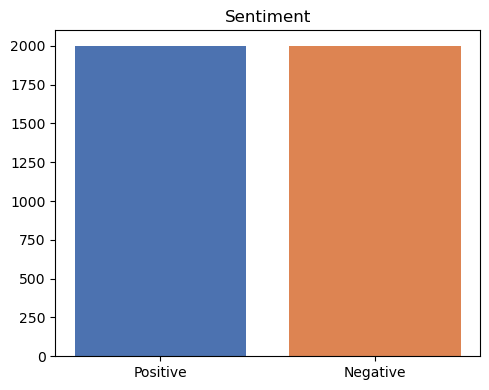

In [180]:
colors = sns.color_palette('deep')

plt.figure(figsize=(5,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_bal.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [181]:
#train and test data 
from sklearn.model_selection import train_test_split

In [182]:
train, test = train_test_split(df_review_bal, test_size=0.33, random_state=30)

train_x,train_y=train['review'],train['sentiment']
test_x,test_y=test['review'],test['sentiment']

In [183]:
train_y.value_counts()

negative    1347
positive    1333
Name: sentiment, dtype: int64

In [184]:
# to convert the text into numeric value we use TFIDF as it takes the weight of the words
#Turning our text data into numeric


In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

In [187]:
train_x_vector

<2680x29132 sparse matrix of type '<class 'numpy.float64'>'
	with 238952 stored elements in Compressed Sparse Row format>

In [188]:
test_x_vector

<1320x29132 sparse matrix of type '<class 'numpy.float64'>'
	with 110930 stored elements in Compressed Sparse Row format>

In [189]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,columns=tfidf.get_feature_names())

C:\Users\Maddy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,007,00s,01,01pm,02,04,05,06,...,zwick,zzzzzzzzzzzzzzzzzz,æon,élan,émigrés,être,ísnt,île,ïn,überwoman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
#Model Selection
#here we use Unsupravised machine learning as our data is classification (discrete)
 



# Support Vector Machine

In [191]:
from sklearn.svm import SVC

In [192]:
svc=SVC(kernel='linear')
svc.fit(train_x_vector,train_y)
svc

SVC(kernel='linear')

In [193]:
#testing

print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))




['positive']
['positive']
['negative']



# Decision tree 

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train_x_vector,train_y)
dec_tree

DecisionTreeClassifier()



# Logistic Regreesion

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
lg=LogisticRegression()
lg.fit(train_x_vector,train_y)

LogisticRegression()

# Navie bayes

In [198]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()


# Model Evaluation




Return the mean accuracy on the given test data and labels.

In [199]:
print(svc.score(train_x_vector,train_y))
print(lg.score(train_x_vector,train_y))
print(gnb.score(train_x_vector.toarray(), train_y))
print(dec_tree.score(test_x_vector, test_y))

0.9929104477611941
0.9686567164179104
0.9850746268656716
0.6871212121212121


In [200]:
#GNB, SVC, Logistic Regression  perform better than the other One classifiers, 
#with GNB having a slight advantage (98% of accuracy).


# F1 Score

In [201]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)


array([0.85862324, 0.85182312])

# Classification Report

In [202]:
from sklearn.metrics import classification_report

print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))


              precision    recall  f1-score   support

    positive       0.85      0.87      0.86       667
    negative       0.86      0.84      0.85       653

    accuracy                           0.86      1320
   macro avg       0.86      0.86      0.86      1320
weighted avg       0.86      0.86      0.86      1320



# Confusion Matrix

In [203]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y, svc.predict(test_x_vector), labels=['positive', 'negative'])
conf

array([[580,  87],
       [104, 549]], dtype=int64)

# Turning the Model

Grid Search CV

In [204]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5,)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})